In [30]:
import math
import numpy as np
from sklearn import datasets # for Iris dataset
import pandas as pd # load dataset-nya
import matplotlib.pyplot as plt # for visualization

In [31]:
iris = datasets.load_iris(as_frame=True)
iris_df = iris.frame

print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

In [32]:
# drop iris virgnica dari data (target = 2)
# ubah semua petal width menjadi 0.2 seperti dataset pada SLP Google Sheets

iris_df = iris_df[iris_df['target'] != 2]
iris_df['petal width (cm)'] = 0.2
print(iris_df)


    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
..                ...               ...                ...               ...   
95                5.7               3.0                4.2               0.2   
96                5.7               2.9                4.2               0.2   
97                6.2               2.9                4.3               0.2   
98                5.1               2.5                3.0               0.2   
99                5.7               2.8                4.1               0.2   

    target  
0        0  
1        0  


/tmp/ipython-input-618363182.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_df['petal width (cm)'] = 0.2


In [33]:
# split data training dan validation
train_df = pd.concat([iris_df[0:40], iris_df[50:90]])
val_df = pd.concat([iris_df[40:50], iris_df[90:100]])

print(train_df)
print(val_df)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
..                ...               ...                ...               ...   
85                6.0               3.4                4.5               0.2   
86                6.7               3.1                4.7               0.2   
87                6.3               2.3                4.4               0.2   
88                5.6               3.0                4.1               0.2   
89                5.5               2.5                4.0               0.2   

    target  
0        0  
1        0  


In [34]:
# Memisahkan fitur dan target
X_train = train_df.drop('target', axis=1).values
y_train = train_df['target'].values
X_val = val_df.drop('target', axis=1).values
y_val = val_df['target'].values

print(X_train)
print(y_train)
print(X_val)
print(y_val)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.2]
 [4.6 3.4 1.4 0.2]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.2]
 [4.3 3.  1.1 0.2]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.2]
 [5.4 3.9 1.3 0.2]
 [5.1 3.5 1.4 0.2]
 [5.7 3.8 1.7 0.2]
 [5.1 3.8 1.5 0.2]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.2]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.2]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.2]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.2]
 [5.2 4.1 1.5 0.2]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.2]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [7.  3.2 4.7 0.2]
 [6.4 3.2 4.5 0.2]
 [6.9 3.1 4.9 0.2]
 [5.5 2.3 4.  0.2]
 [6.5 2.8 4.6 0.2]
 [5.7 2.8 4.5 0.2]
 [6.3 3.3 4.7 0.2]
 [4.9 2.4 3.3 0.2]
 [6.6 2.9 4.6 0.2]
 [5.2 2.7 3.9 0.2]
 [5.  2.  3.5 0.2]
 [5.9 3.  4.2 0.2]
 [6.  2.2 4.

In [35]:
# 1. Inisialisasi bobot dan bias
def initialize_weights(n_features):
    weights = np.full(n_features, 0.5)   # semua bobot = 0.5
    bias = 0.5
    return weights, bias

# 2. Dot product
def dot_product(X, weights, bias):
    return np.dot(X, weights) + bias

# 3. Fungsi aktivasi (sigmoid)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 4. Prediksi
def predict(inputs, weights, bias):
    pred_value = sigmoid(dot_product(inputs, weights, bias))
    class_pred = 1 if pred_value >= 0.5 else 0
    return class_pred, pred_value

# 5. Evaluasi (loss & akurasi)
def evaluate(X, y, weights, bias):
    total_loss, correct = 0, 0
    for inputs, target in zip(X, y):
        class_pred, pred_value = predict(inputs, weights, bias)
        error = pred_value - target
        total_loss += error**2
        correct += (class_pred == target)
    loss = total_loss / len(X)
    acc = correct / len(X)
    return loss, acc

# 6. Training loop
def train(X_train, y_train, X_val, y_val, lr=0.1, epochs=200):
    weights, bias = initialize_weights(X_train.shape[1])
    history = []

    for epoch in range(1, epochs + 1):
        total_train_loss, correct_train = 0, 0

        for inputs, target in zip(X_train, y_train):
            class_pred, pred_value = predict(inputs, weights, bias)
            error = pred_value - target

            # update bobot dan bias
            grad = 2 * error * pred_value * (1 - pred_value)
            weights -= lr * grad * inputs
            bias -= lr * grad

            total_train_loss += error**2
            correct_train += (class_pred == target)

        train_loss = total_train_loss / len(X_train)
        train_acc = correct_train / len(X_train)

        # validasi
        val_loss, val_acc = evaluate(X_val, y_val, weights, bias)

        history.append({
            'epoch': epoch,
            'train_loss': train_loss,
            'train_acc': train_acc,
            'val_loss': val_loss,
            'val_acc': val_acc
        })

    return weights, bias, pd.DataFrame(history)


In [36]:
weights, bias, history = train(X_train, y_train, X_val, y_val, lr=0.1, epochs=5)

print(history.head())

   epoch  train_loss  train_acc  val_loss  val_acc
0      1    0.449211     0.5250  0.370544      0.5
1      2    0.050786     0.9375  0.298363      0.5
2      3    0.032975     0.9500  0.227337      0.5
3      4    0.022917     0.9750  0.165211      0.5
4      5    0.017006     0.9750  0.115915      0.9


In [37]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Grafik Loss
    ax[0].plot(history['epoch'], history['train_loss'], label='Train Loss')
    ax[0].plot(history['epoch'], history['val_loss'], label='Validation Loss')
    ax[0].set_xlabel("Epoch")
    ax[0].set_ylabel("Loss (MSE)")
    ax[0].set_title("Training vs Validation Loss")
    ax[0].legend()
    ax[0].set_xticks(history['epoch'])

    # Grafik Akurasi
    ax[1].plot(history['epoch'], history['train_acc'], label='Train Accuracy')
    ax[1].plot(history['epoch'], history['val_acc'], label='Validation Accuracy')
    ax[1].set_xlabel("Epoch")
    ax[1].set_ylabel("Accuracy")
    ax[1].set_title("Training vs Validation Accuracy")
    ax[1].legend()
    ax[1].set_xticks(history['epoch'])

    plt.show()


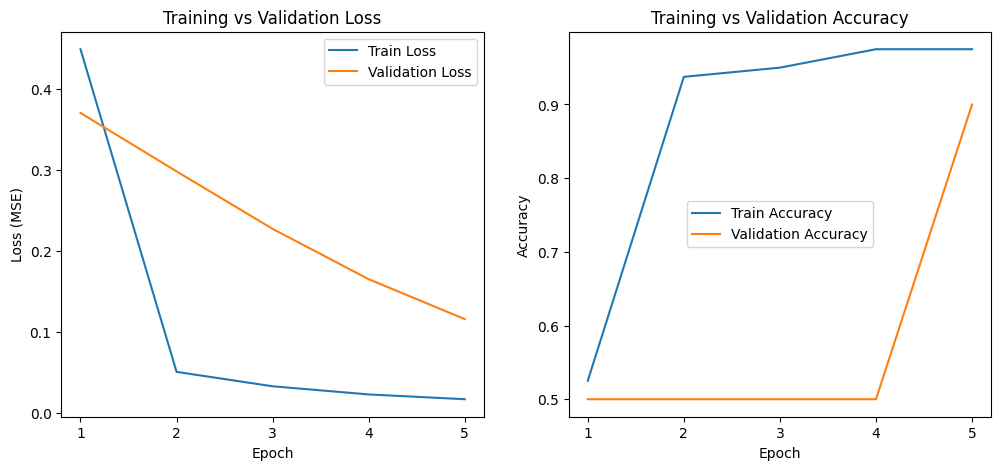

In [38]:
weights, bias, history = train(X_train, y_train, X_val, y_val, lr=0.1, epochs=5)

plot_history(history)
